100%|██████████| 9912422/9912422 [00:00<00:00, 86312532.69it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 111645800.76it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 23284418.44it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3407356.25it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



tensor(0.) tensor(1.)
Epoch:1, Loss:0.0608
Epoch:2, Loss:0.0631
10000


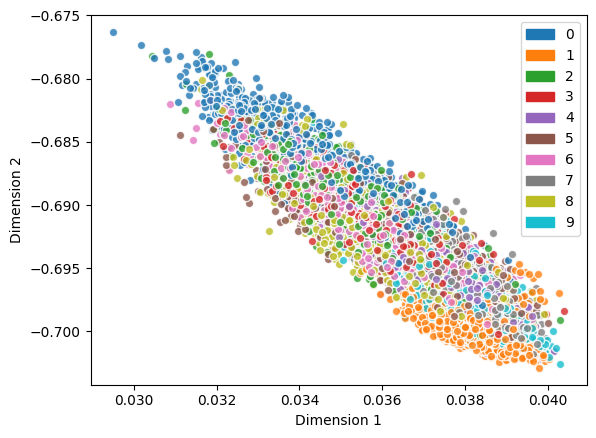

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define a transform to convert images to tensors
transform = transforms.ToTensor()

# Load the MNIST dataset
mnist_train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

mnist_test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create a data loader to load the data in batches
data_loader = torch.utils.data.DataLoader(dataset=mnist_train_data, batch_size=64, shuffle=True)

data_loader_test = torch.utils.data.DataLoader(dataset=mnist_test_data, batch_size=10000, shuffle=False)


dataiter = iter(data_loader)
images, labels = dataiter.__next__()
print(torch.min(images), torch.max(images))

# This is the definition of the Autoencoder model using a neural network with encoder and decoder modules.
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # N, 784
        self.encoder = nn.Sequential(
            nn.Linear(784, 392),
            nn.ReLU(),
            nn.Linear(392, 196),
            nn.ReLU(),
            nn.Linear(196, 98),
            nn.ReLU(),
            nn.Linear(98, 49),
            nn.ReLU(),
            nn.Linear(49, 16),
            nn.ReLU(),
            nn.Linear(16, 2)
        )

        self.decoder = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 49),
            nn.ReLU(),
            nn.Linear(49, 98),
            nn.ReLU(),
            nn.Linear(98, 196),
            nn.ReLU(),
            nn.Linear(196, 392),
            nn.ReLU(),
            nn.Linear(392, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

#These lines define the loss function (MSE loss), instantiate the Autoencoder model
# learning rate of 1e-3 and L2 regularization with a weight decay of 1e-5.
criterion = nn.MSELoss()
model = Autoencoder()
optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-10, momentum=0.9)

# train the model over n epochs
num_epochs = 2
outputs = []
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        img = img.reshape(-1,28*28)
        recon = model(img)
        loss = criterion(recon,img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))


encPics = []
labels = []

for (img, l) in data_loader_test:
  item = img.reshape(-1,28 * 28)
  enc = model.encoder(item)
  encPics.append(enc)
  labels.append(l)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
labelsTest = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

i=0

lab_test = []
e_first_test = []
e_second_test = []

for e, l in zip(encPics[0], labels[0]):
  e = e.detach().numpy()
  l = l.detach().numpy()
  l = l.flat[0]
  lab_test.append(l)
  e_first_test.append(e[0])
  e_second_test.append(e[1])
  plt.scatter(e[0], e[1], label=l, c=colors[l], marker='o', alpha=0.8, edgecolors='white')
  i = i+1
  #if(i >= 1000): break
print(i)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

zero = mpatches.Patch(color='#1f77b4', label=0)
one = mpatches.Patch(color='#ff7f0e', label=1)
two = mpatches.Patch(color='#2ca02c', label=2)
three = mpatches.Patch(color='#d62728', label=3)
four = mpatches.Patch(color='#9467bd', label=4)
five = mpatches.Patch(color='#8c564b', label=5)
six = mpatches.Patch(color='#e377c2', label=6)
seven = mpatches.Patch(color='#7f7f7f', label=7)
eight = mpatches.Patch(color='#bcbd22', label=8)
nine = mpatches.Patch(color='#17becf', label=9)

plt.legend(handles=[zero, one, two, three, four, five, six, seven, eight, nine], loc='best')
#plt.legend(loc='lower left')
plt.savefig('test.png')
plt.show()
